# 1- Análise Exploratória e Pré-processamento

### 1.0 - Análise inicial

In [73]:
import pandas as pd
import matplotlib as plt
import numpy as np

# Pré processamento
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Supervisionada
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Nao Supervisionada
from sklearn.cluster import KMeans

 # Metricas
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [74]:
df = pd.read_csv("data/akc-data-latest.csv")
df.head(3)

,Unnamed: 0,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
0,Affenpinscher,The Affen’s apish look has been described many...,"Confident, Famously Funny, Fearless",148,22.86,29.21,3.175147,4.535924,12.0,15.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.6,Regular Exercise,0.8,Easy Training,1.0,Outgoing
1,Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",113,63.50,68.58,22.679619,27.215542,12.0,15.0,...,0.8,Daily Brushing,0.2,Infrequent,0.8,Energetic,0.2,May be Stubborn,0.2,Aloof/Wary
2,Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",60,58.42,58.42,22.679619,31.751466,11.0,14.0,...,0.6,2-3 Times a Week Brushing,0.4,Occasional,0.6,Regular Exercise,1.0,Eager to Please,0.8,Friendly


Como 21 colunas é um número relativamente alto, seria interessante encontrar maneiras de reduzir a dimensionalidade dos dados

In [75]:
len(df)

277

277 é um número baixo de dados, pode ser que seja necessário fazer algum tipo de data augmentation ou oversample

In [76]:
# Exemplo de linha completa, com todas as colunas e seus respectivos valores
for column in df.columns:
    print(column + " - " + str(df.iloc[0][column]))

Unnamed: 0 - Affenpinscher
description - The Affen’s apish look has been described many ways. They’ve been called “monkey dogs” and “ape terriers.” The French say diablotin moustachu (“mustached little devil”), and Star Wars fans argue whether they look more like Wookies or Ewoks.Standing less than a foot tall, these sturdy terrier-like dogs approach life with great confidence. “This isn’t a breed you train,” a professional dog handler tells us, “He’s like a human. You befriend him.” The dense, harsh coat is described as “neat but shaggy” and comes in several colors; the gait is light and confident. They can be willful and domineering, but mostly Affens are loyal, affectionate, and always entertaining. Affen people say they love being owned by their little monkey dogs. The Affenpinscher: loyal, curious, and famously amusing; this almost-human toy dog is fearless out of all proportion to his size. As with all great comedians, it’s the Affenpinscher’s apparent seriousness of purpose that

In [77]:
df.describe()

,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
count,277.000000,277.000000,275.000000,275.000000,274.000000,274.000000,270.000000,257.000000,271.000000,253.000000,252.000000
mean,44.225801,52.720588,17.888858,27.291416,11.306569,13.832117,0.425926,0.529183,0.712915,0.624506,0.620635
std,14.238298,15.885454,12.290600,19.061416,1.817949,2.016668,0.198306,0.189068,0.168927,0.247271,0.201713
min,12.700000,17.780000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,33.020000,38.100000,8.164663,12.927383,10.000000,13.000000,0.200000,0.400000,0.600000,0.400000,0.400000
50%,45.085000,53.340000,15.875733,24.947580,12.000000,14.000000,0.400000,0.600000,0.600000,0.600000,0.600000
75%,55.880000,66.040000,22.679619,34.019428,12.000000,15.000000,0.600000,0.600000,0.800000,0.800000,0.800000
max,76.200000,88.900000,68.038855,108.862169,16.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
print(df["group"].value_counts())

group
Foundation Stock Service    68
Hound Group                 32
Sporting Group              32
Terrier Group               31
Working Group               31
Herding Group               30
Toy Group                   21
Non-Sporting Group          21
Miscellaneous Class         11
Name: count, dtype: int64


O nosso objetivo é tentar predizer o "group" de um objeto (supervisionado) e tentar agrupar objetos em torno dos grupos (não supervisionado). Aqui podemos perceber que as classes de grupo estão bastante desbalanceadas, então provavelmente algum tipo de oversample aqui ajudaria.

### 1.1 - Atributos que não serão utilizados

As colunas Unnamed: 0, description e popularity são únicas (ou perto disso) para cada elemento do dataset, logo não ajudarão no treinamento e podem ser removidas

In [79]:
df["Unnamed: 0"].value_counts()

Unnamed: 0
Affenpinscher                   1
Papillon                        1
Petit Basset Griffon Vendéen    1
Peruvian Inca Orchid            1
Perro de Presa Canario          1
                               ..
English Cocker Spaniel          1
English Foxhound                1
English Setter                  1
English Springer Spaniel        1
Yorkshire Terrier               1
Name: count, Length: 277, dtype: int64

In [80]:
df["description"].value_counts()

description
Poodles come in three size varieties: Standards should be more than 15 inches tall at the shoulder; Miniatures are 15 inches or under; Toys stand no more than 10 inches. All three varieties have the same build and proportions. At dog shows, Poodles are usually seen in the elaborate Continental Clip. Most pet owners prefer the simpler Sporting Clip, in which the coat is shorn to follow the outline of the squarely built, smoothly muscled body.Forget those old stereotypes of Poodles as sissy dogs. Poodles are eager, athletic, and wickedly smart “real dogs” of remarkable versatility. The Standard, with his greater size and strength, is the best all-around athlete of the family, but all Poodles can be trained with great success. Whether Standard, Miniature, or Toy, and either black, white, or apricot, the Poodle stands proudly among dogdom’s true aristocrats. Beneath the curly, low-allergen coat is an elegant athlete and companion for all reasons and seasons.                    

OBS: A descrição as vezes é bem semelhante para animais de mesma raça, sendo completamente igual apenas uma vez para o Poodle (Miniature) e Poodle (Standard) (no Poodle (Toy) ela já varia um pouco), porém muitas vezes isso não acontece e as descrições acabam sendo strings bem longas, portanto achei que seria complicado tentar manter algum tipo de relação entre as descrições para ajudar na predição e achei melhor apenas desconsiderar a coluna mesmo

In [81]:
df["popularity"].value_counts()

popularity
7      3
of     3
17     2
140    2
133    2
      ..
176    1
67     1
52     1
188    1
10     1
Name: count, Length: 191, dtype: int64

In [82]:
for _, element in df.loc[df["popularity"] == "7"].iterrows():
    print(element["group"])

Non-Sporting Group
Non-Sporting Group
Toy Group


In [83]:
for _, element in df.loc[df["popularity"] == "of"].iterrows():
    print(element["group"])

Hound Group
Sporting Group
Working Group


In [84]:
for _, element in df.loc[df["popularity"] == "17"].iterrows():
    print(element["group"])

Herding Group
Working Group


OBS: O popularity as vezes se repete, porém essas repetições não aparentam ter uma relação muito direta com o "group" que é o nosso label, achei melhor tirar junto com os outros 2

In [85]:
df_clean = df.drop(columns=["Unnamed: 0", "description", "popularity"])

### 1.2 - Temperament

Temperament é um caso a parte, pois poderia ser interessante mantê-la, porém para isso seria necessário splitar os adjetivos, organizá-los em listas e depois tokenizá-los para passar para o modelo (tokenizar direto criaria um valor para cada conjunto de 3 adjetivos e não para cada adjetivo individual, o que não ajudaria muio). Deixei para fazer isso apenas se os atributos selecionados não forem suficientes para alcançar um resultado satisfatório

In [86]:
# from sklearn.preprocessing import LabelEncoder

# PRIMEIRO PRECISARIA ORGANIZAR OS ADJETIVOS EM LISTAS DE ADJETIVOS

# le = LabelEncoder()
# df_clean['temperament'] = le.fit_transform(df_clean['temperament'])

In [87]:
df_clean["temperament"].value_counts()

temperament
Friendly, Smart, Willing to Please    3
Friendly, Alert, Intelligent          2
Loyal, Intelligent, Active            2
Loyal, Independent, Calm              2
Loyal, Alert, Intelligent             2
                                     ..
Intelligent, Lively, Athletic         1
Energetic, Merry, Responsive          1
Affectionate, Gentle, Sociable        1
Friendly, Mellow, Merry               1
Affectionate, Sprightly, Tomboyish    1
Name: count, Length: 267, dtype: int64

In [88]:
df_clean = df_clean.drop(columns=["temperament"])

### 1.x - Atributos redundantes

Para todos os campos de baixo, temos uma coluna que representa alguma característica por meio de classes e outra coluna que representa essa mesma característica numericamente, logo seria redundante manter os 2 por isso vou manter apenas o value e não o category (uma vez que já são valores númericos e normalizado de 0 - 1)

In [89]:
print(df_clean["grooming_frequency_value"].value_counts())
print()
print(df_clean["grooming_frequency_category"].value_counts())

grooming_frequency_value
0.4    119
0.2     75
0.6     50
0.8     18
1.0      8
Name: count, dtype: int64

grooming_frequency_category
Weekly Brushing              119
Occasional Bath/Brush         75
2-3 Times a Week Brushing     50
Daily Brushing                18
Specialty/Professional         8
Name: count, dtype: int64


In [90]:
print(df_clean["shedding_value"].value_counts())
print()
print(df_clean["shedding_category"].value_counts())

shedding_value
0.6    125
0.4     59
0.2     37
0.8     30
1.0      6
Name: count, dtype: int64

shedding_category
Seasonal      125
Occasional     59
Infrequent     37
Regularly      30
Frequent        6
Name: count, dtype: int64


In [91]:
print(df_clean["energy_level_value"].value_counts())
print()
print(df_clean["energy_level_category"].value_counts())

energy_level_value
0.6    118
0.8     92
1.0     41
0.4     19
0.2      1
Name: count, dtype: int64

energy_level_category
Regular Exercise          118
Energetic                  92
Needs Lots of Activity     41
Calm                       19
Couch Potato                1
Name: count, dtype: int64


In [92]:
print(df_clean["trainability_value"].value_counts())
print()
print(df_clean["trainability_category"].value_counts())

trainability_value
0.6    77
0.4    66
1.0    50
0.8    39
0.2    21
Name: count, dtype: int64

trainability_category
Agreeable          77
Independent        66
Eager to Please    50
Easy Training      39
May be Stubborn    21
Name: count, dtype: int64


In [93]:
print(df_clean["demeanor_value"].value_counts())
print()
print(df_clean["demeanor_category"].value_counts())

demeanor_value
0.8    77
0.6    75
0.4    73
1.0    19
0.2     8
Name: count, dtype: int64

demeanor_category
Friendly                   77
Alert/Responsive           75
Reserved with Strangers    73
Outgoing                   19
Aloof/Wary                  8
Name: count, dtype: int64


In [94]:
df_clean = df_clean.drop(columns=["grooming_frequency_category", "shedding_category", "energy_level_category", "trainability_category", "demeanor_category"])

### 1.x - Limpeza dos dados (duplicados, inconsistentes, outliers...)

Como não pretendia utilizar nenhuma das colunas dos passos anteriores, resolvi deixar para limpar o dataset depois da remoção delas, visto que tratar seus valores problemáticos seria inútil

In [95]:
df_clean.isna().sum()

min_height                   0
max_height                   0
min_weight                   2
max_weight                   2
min_expectancy               3
max_expectancy               3
group                        0
grooming_frequency_value     7
shedding_value              20
energy_level_value           6
trainability_value          24
demeanor_value              25
dtype: int64

In [96]:
df_clean.duplicated().sum()

1

Como estamos com poucos valores e temos uma roporção alta de objetos com valores faltantes (quase 10% só em demeanor_value), preferi não excluir esses elementos mas preenchê-los usando uma heurística com a média e desvio padrão, caso o modelo não atinja um resultado satisfatório esse passo pode ser revisto

Material de apoio (além dos slides maravilhosos da senhora): https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/#:~:text=If%20there%20are%20way%20too,%2C%20dropna%2C%20bfill%20and%20interpolate.

<b>Não sei se faz muito sentido fazer isso para as colunas de min e max, visto que elas serão o foco do estudo de correlação então talvez vala a pena dropar esses elementos que são poucos, mas isso vamos vendo</b>

In [97]:
for column in ["min_weight", "max_weight", "min_expectancy", "max_expectancy", "grooming_frequency_value", 
               "shedding_value", "energy_level_value", "trainability_value", "demeanor_value"]:
    mean = df_clean[column].mean()
    std = df_clean[column].std()

    alpha = pd.Series(np.random.randn(len(df_clean)), index=df.index)
    # Cria uma series de valores aleatórios com média 0 e variância 1 do tamanho do len do df, esses valores serão utilizados no desvio padrão para compor o nosso valor artificial

    # df_clean[column] = df_clean[column].fillna(mean + std * alpha)
    df_clean[column] = df_clean[column].fillna(mean)
    # preenche os valores nan para cada coluna usando a média e o desvio padrão daquela coluna, além da taxa aleatória já explicada

### 1.5 - Correlação

Utilizei da correlação para realizar a redução de dimensionalidade final caso haja atributos com uma alta taxa de correlação

In [98]:
for column in df_clean.columns:
    print(column + " - " + str(df_clean.iloc[0][column]))

min_height - 22.86
max_height - 29.21
min_weight - 3.17514659
max_weight - 4.535923700000001
min_expectancy - 12.0
max_expectancy - 15.0
group - Toy Group
grooming_frequency_value - 0.6
shedding_value - 0.6
energy_level_value - 0.6
trainability_value - 0.8
demeanor_value - 1.0


In [99]:
corr = df_clean.corr(numeric_only=True)
corr.style.background_gradient(cmap="coolwarm")

,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
min_height,1.000000,0.935146,0.814262,0.791436,-0.458785,-0.461913,-0.183545,0.277820,0.172638,-0.047262,-0.229442
max_height,0.935146,1.000000,0.791552,0.804923,-0.440156,-0.465925,-0.240146,0.313218,0.197209,-0.049793,-0.282426
min_weight,0.814262,0.791552,1.000000,0.947519,-0.537433,-0.547091,-0.134140,0.279310,-0.071636,-0.121027,-0.253923
max_weight,0.791436,0.804923,0.947519,1.000000,-0.511205,-0.520140,-0.112737,0.275923,-0.075853,-0.068254,-0.248422
min_expectancy,-0.458785,-0.440156,-0.537433,-0.511205,1.000000,0.765434,0.028543,-0.244576,-0.000174,0.088102,0.173871
max_expectancy,-0.461913,-0.465925,-0.547091,-0.520140,0.765434,1.000000,0.124627,-0.346995,0.012221,0.090090,0.161104
grooming_frequency_value,-0.183545,-0.240146,-0.134140,-0.112737,0.028543,0.124627,1.000000,-0.068768,-0.149653,0.096184,0.109718
shedding_value,0.277820,0.313218,0.279310,0.275923,-0.244576,-0.346995,-0.068768,1.000000,0.167329,0.041539,-0.174064
energy_level_value,0.172638,0.197209,-0.071636,-0.075853,-0.000174,0.012221,-0.149653,0.167329,1.000000,0.109882,-0.002875
trainability_value,-0.047262,-0.049793,-0.121027,-0.068254,0.088102,0.090090,0.096184,0.041539,0.109882,1.000000,0.330953


Aqui podemos ver uma forte correlação entre as colunas de min e max (height, weight e expectancy), podendo ser interessante manter apenas o min ou o max (no describe percebi que o min sempre tinha uma variância menor do que o max, por isso escolhi ficar com o max pois ele poderia ser mais representativo das classes).

Também há uma boa correlação entre weight e height, logo também podemos escolher apenas uma das duas colunas para ficar (escolhi o weight pois tinha uma maior variância).

<b>OBS: Também há uma boa correlação negativa entre weight/height e expectancy, mas aqui ainda não decidi o que farei a respeito</b>

Aqui seria interessante fazer aquela estratégia de misturar esses atributos 2 a 2 no lugar de escolher apenas 1 para ficar.

In [100]:
df_clean = df_clean.drop(columns=["min_height", "max_height", "min_weight", "min_expectancy"])
# df_clean = df_clean.drop(columns=["min_height",  "min_weight", "min_expectancy"])

### 1.x - Oversampling e Split dos dados

In [101]:
len(df_clean)

277

In [102]:
print(df_clean["group"].value_counts())

group
Foundation Stock Service    68
Hound Group                 32
Sporting Group              32
Terrier Group               31
Working Group               31
Herding Group               30
Toy Group                   21
Non-Sporting Group          21
Miscellaneous Class         11
Name: count, dtype: int64


Como já havia falado, não só temos poucos dados como as classes estão bem desbalanceadas, então para melhorar isso vou utilizar a técnica SMOTE de oversampling para aumentar a quantidade de dados e balanceá-los no processo.

Um detalhe é que o SMOTE só aceita valores numéricos, por isso antes de usá-lo eu faço uma conversão da coluna group usando o LabelEncoder do sklearn.

In [103]:
label_encoder = LabelEncoder()

group = label_encoder.fit_transform(df_clean["group"])

group = pd.DataFrame(group, columns=['group'])

df_clean["group"] = group

In [104]:
# Value count do group valores convertidos para numérico
print(df_clean["group"].value_counts())

group
0    68
2    32
5    32
6    31
8    31
1    30
7    21
4    21
3    11
Name: count, dtype: int64


In [105]:
smote = SMOTE(random_state=0)

In [106]:
# Aqui eu separo os dados entre atributos e target, essas duas variáveis serão utilizadas ao longo de todo o notebook
X = df_clean.drop(columns=["group"])
y = df_clean["group"]

In [110]:
type(y)

pandas.core.series.Series

In [111]:
# Aplicação do SMOTE e conversão de volta para dataframe
X_resampled, y_resampled = smote.fit_resample(X, y)

X = pd.DataFrame(X_resampled, columns=X.columns)
y = pd.DataFrame(y_resampled, columns=['group'])

# Aqui eu atualizei o df_clean só para mostrar os dados dele mesmo, nos treinamentos será sempre usado só o X e y
df_clean = pd.merge(X, y, left_index=True, right_index=True)


TypeError: Series.__init__() got an unexpected keyword argument 'columns'

In [36]:
# Agora temos um número de elementos maior
len(df_clean)

612

In [37]:
# group agora está com as classes devidamente balanceadas
df_clean["group"].value_counts()

group
7    68
2    68
6    68
8    68
0    68
4    68
5    68
1    68
3    68
Name: count, dtype: int64

In [38]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) holdout de 20%

Aqui é instanciado o skf, que será utilizado para realizar a validação cruzada nos modelos

In [39]:
# Stratified 10 fold cross validation, será utilizado para realizar a validação cruzada dos modelos
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# 2 - Aprendizagem supervisionada

In [40]:
for column in df_clean.columns:
    print(column + " - " + str(df_clean.iloc[0][column]))

max_weight - 4.535923700000001
max_expectancy - 15.0
grooming_frequency_value - 0.6
shedding_value - 0.6
energy_level_value - 0.6
trainability_value - 0.8
demeanor_value - 1.0
group - 7.0


In [41]:
corr = df_clean.corr(numeric_only=True)
corr.style.background_gradient(cmap="coolwarm")

,max_weight,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value,group
max_weight,1.000000,-0.623485,-0.128379,0.313477,0.050503,-0.042185,-0.288131,-0.036065
max_expectancy,-0.623485,1.000000,0.151544,-0.426205,-0.016402,0.086135,0.229259,0.019206
grooming_frequency_value,-0.128379,0.151544,1.000000,-0.126824,-0.188607,0.048728,0.142812,0.248687
shedding_value,0.313477,-0.426205,-0.126824,1.000000,0.200859,0.034298,-0.272546,-0.104381
energy_level_value,0.050503,-0.016402,-0.188607,0.200859,1.000000,0.152556,-0.059212,-0.111742
trainability_value,-0.042185,0.086135,0.048728,0.034298,0.152556,1.000000,0.316291,-0.009415
demeanor_value,-0.288131,0.229259,0.142812,-0.272546,-0.059212,0.316291,1.000000,0.227911
group,-0.036065,0.019206,0.248687,-0.104381,-0.111742,-0.009415,0.227911,1.000000


Finalizado o nosso pré-processamento, ficamos com apenas 8 atributos (sendo um deles o próprio label) dos 21 iniciais, tendo eles pouca correlação entre si, também temos um volume consideravelmente maior de dados (277 para 612) que agora estão balanceados em cima do group, sendo essa uma conjuntura bem melhor para os modelos, resta saber se esses atributos serão suficientes para representar bem os nossos dados.

### 2.1 - Árvore de Decisão

In [42]:
clf = DecisionTreeClassifier(random_state=0)

In [43]:
y_test_tree = []
y_pred_tree = []

acc_tree = []
f1_tree = []

# Treinamento e validação em cima dos folds
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Treinamento e validação
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    y_test_tree.append(y_test)
    y_pred_tree.append(y_pred)
    
    # Métricas
    acc = accuracy_score(y_test, y_pred)
    acc_tree.append(acc)

    f1 = f1_score(y_test, y_pred, average='weighted') 
    f1_tree.append(f1)

In [44]:
for i in range (10):
    print(f'Accuracy do fold {i}: {acc_tree[i]}')

mean_acc_score = sum(acc_tree) / len(acc_tree)
print(f'\nAccuracy média: {mean_acc_score}')

Accuracy do fold 0: 0.6290322580645161
Accuracy do fold 1: 0.5967741935483871
Accuracy do fold 2: 0.5081967213114754
Accuracy do fold 3: 0.6557377049180327
Accuracy do fold 4: 0.7704918032786885
Accuracy do fold 5: 0.6229508196721312
Accuracy do fold 6: 0.6229508196721312
Accuracy do fold 7: 0.6721311475409836
Accuracy do fold 8: 0.6065573770491803
Accuracy do fold 9: 0.5409836065573771

Accuracy média: 0.6225806451612904


In [45]:
for i in range (10):
    print(f'F1-score do fold {i}: {f1_tree[i]}')

mean_f1_score = sum(f1_tree) / len(f1_tree)
print(f'\nF1-score médio: {mean_f1_score}')

F1-score do fold 0: 0.6317502311098135
F1-score do fold 1: 0.5955699897825136
F1-score do fold 2: 0.5157801215178265
F1-score do fold 3: 0.649468837173755
F1-score do fold 4: 0.7702395964691046
F1-score do fold 5: 0.5914156665882291
F1-score do fold 6: 0.614530414940251
F1-score do fold 7: 0.6678539560334211
F1-score do fold 8: 0.5982756314723527
F1-score do fold 9: 0.5454456290521864

F1-score médio: 0.6180330074139453


Selecione o fold a ser representado na matriz por meio da variável fold

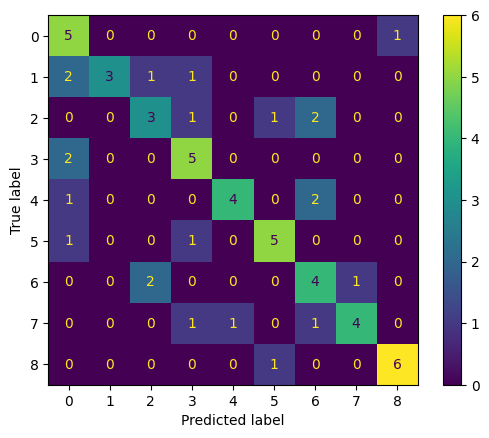

In [46]:
fold = 0

cm = confusion_matrix(y_test_tree[fold], y_pred_tree[fold])
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

### 2.2 - Naive Bayes

In [47]:
gnb = GaussianNB()

In [48]:
y_test_gnb = []
y_pred_gnb = []

acc_gnb = []
f1_gnb = []

# Treinamento e validação em cima dos folds
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Treinamento e validação
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)

    y_test_gnb.append(y_test)
    y_pred_gnb.append(y_pred)
    
    # Métricas
    acc = accuracy_score(y_test, y_pred)
    acc_gnb.append(acc)

    f1 = f1_score(y_test, y_pred, average='weighted') 
    f1_gnb.append(f1)

d:\Faculdade\Ciência da Computação\P4\Introdução a IA\prova_ia\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Faculdade\Ciência da Computação\P4\Introdução a IA\prova_ia\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Faculdade\Ciência da Computação\P4\Introdução a IA\prova_ia\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Faculdade\Ciência da Computação\P4\Introdução a IA\prova_ia\venv\Lib\s

In [49]:
for i in range (10):
    print(f'Accuracy do fold {i}: {acc_gnb[i]}')

mean_acc_score = sum(acc_gnb) / len(acc_gnb)
print(f'\nAccuracy média: {mean_acc_score}')

Accuracy do fold 0: 0.43548387096774194
Accuracy do fold 1: 0.43548387096774194
Accuracy do fold 2: 0.36065573770491804
Accuracy do fold 3: 0.45901639344262296
Accuracy do fold 4: 0.5737704918032787
Accuracy do fold 5: 0.45901639344262296
Accuracy do fold 6: 0.45901639344262296
Accuracy do fold 7: 0.4426229508196721
Accuracy do fold 8: 0.5081967213114754
Accuracy do fold 9: 0.4098360655737705

Accuracy média: 0.4543098889476468


In [50]:
for i in range (10):
    print(f'F1-score do fold {i}: {f1_gnb[i]}')

mean_f1_score = sum(f1_gnb) / len(f1_gnb)
print(f'\nF1-score médio: {mean_f1_score}')

F1-score do fold 0: 0.40164290695599997
F1-score do fold 1: 0.39243646138807425
F1-score do fold 2: 0.34104143500682105
F1-score do fold 3: 0.43751676135196405
F1-score do fold 4: 0.5653760361571355
F1-score do fold 5: 0.38443450902467297
F1-score do fold 6: 0.43499433171564317
F1-score do fold 7: 0.42652895498147486
F1-score do fold 8: 0.5069841842503366
F1-score do fold 9: 0.3747302788286395

F1-score médio: 0.4265685859660763


Selecione o fold a ser representado na matriz por meio da variável fold

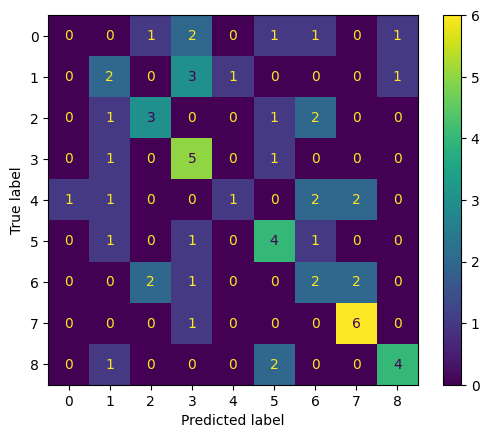

In [51]:
fold = 0

cm = confusion_matrix(y_test_gnb[fold], y_pred_gnb[fold])
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

### 2.3 MLP TA SAINDO IGUAL A ARVORE DE DECISAO

In [70]:
mlp = MLPClassifier(random_state=0, hidden_layer_sizes=(50,) ,max_iter=2000)

In [71]:
y_test_mlp = []
y_pred_mlp = []

acc_mlp = []
f1_mlp = []

# Treinamento e validação em cima dos folds
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Treinamento e validação
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)

    y_test_mlp.append(y_test)
    y_pred_mlp.append(y_pred)
    
    # Métricas
    acc = accuracy_score(y_test, y_pred)
    acc_mlp.append(acc)

    f1 = f1_score(y_test, y_pred, average='weighted') 
    f1_mlp.append(f1)

d:\Faculdade\Ciência da Computação\P4\Introdução a IA\prova_ia\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Faculdade\Ciência da Computação\P4\Introdução a IA\prova_ia\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Faculdade\Ciência da Computação\P4\Introdução a IA\prova_ia\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Faculda

In [72]:
for i in range (10):
    print(f'Accuracy do fold {i}: {acc_mlp[i]}')

mean_acc_score = sum(acc_mlp) / len(acc_mlp)
print(f'\nAccuracy média: {mean_acc_score}')

Accuracy do fold 0: 0.5806451612903226
Accuracy do fold 1: 0.6451612903225806
Accuracy do fold 2: 0.47540983606557374
Accuracy do fold 3: 0.5573770491803278
Accuracy do fold 4: 0.639344262295082
Accuracy do fold 5: 0.5081967213114754
Accuracy do fold 6: 0.5737704918032787
Accuracy do fold 7: 0.6065573770491803
Accuracy do fold 8: 0.6885245901639344
Accuracy do fold 9: 0.6229508196721312

Accuracy média: 0.5897937599153887


In [63]:
for i in range (10):
    print(f'F1-score do fold {i}: {f1_mlp[i]}')

mean_f1_score = sum(f1_mlp) / len(f1_mlp)
print(f'\nF1-score médio: {mean_f1_score}')

F1-score do fold 0: 0.5277034872148724
F1-score do fold 1: 0.5489444695089856
F1-score do fold 2: 0.44592265657839425
F1-score do fold 3: 0.5319250100590506
F1-score do fold 4: 0.5775727005235203
F1-score do fold 5: 0.4974196568458864
F1-score do fold 6: 0.553992562671444
F1-score do fold 7: 0.6648868890672169
F1-score do fold 8: 0.6087501751436177
F1-score do fold 9: 0.5834270704848789

F1-score médio: 0.5540544678097867


Selecione o fold a ser representado na matriz por meio da variável fold

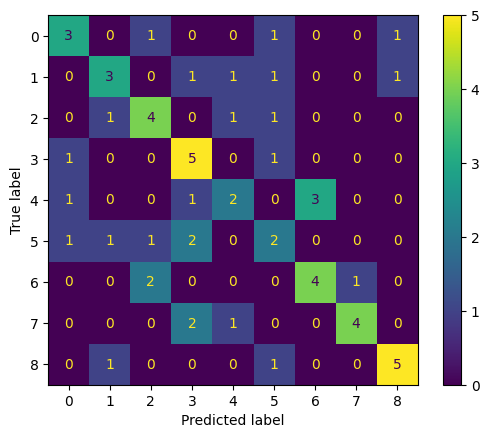

In [56]:
fold = 0

cm = confusion_matrix(y_test_mlp[fold], y_pred_mlp[fold])
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# 3 - Aprendizagem Não Supervisionada

In [57]:
# df_clean = df_clean.drop(columns=["group"]) só usar o X

### 3.1 - K-means

https://medium.com/data-folks-indonesia/step-by-step-to-understanding-k-means-clustering-and-implementation-with-sklearn-b55803f519d6

In [58]:
kmeans = KMeans(n_clusters=9, random_state=0)

In [59]:
kmeans.fit(X)
kmeans_labels = kmeans.labels_

### 3.2 - Hierárquico